# 常微分方程式の初期値問題

### 常微分方程式の初期値問題

微分方程式

$$
\frac{d}{dt} x = f(x, t)\\
$$
と
初期条件
$$
x(a) = x_0\\
$$
を与えて, 関数$x(t)\ (a \leq x \leq b)$を求めるというのが問題.

数学的な解の一意性の定理は, [ここ](http://stairlimit.html.xdomain.jp/text16-3.pdf)などを参照.

連立方程式の場合も上の形式に帰着できる. たとえば,
$$
\frac{d^3x}{dt^3}\\
$$
において, 
$$
x^1 = x, x^2 = \dot x, x^3 = \ddot x\\
$$
などと置くと, 
$$
\frac{dx^1}{dt} = x^2\\
\frac{dx^2}{dt} = x^3\\
\frac{dx^3}{dt} = x^2\\
$$
となり, 上の形に帰着できた.

### Euler法

$$
t_n = a + nh\\
$$
と定め, 
$$
x^i_{n+1} = x^i_{n} + hf^i_n, \, f_n = f^i(x^i_n, \cdots, x^m_n, t_n)\\
$$
によって次々と未知関数$x^i(t_n)$の近似値$x^i_n$を定めていく.

### 例1
$\dot x = 1 - x^2, \ x(0) = 0$のとき(解析解はtanh(x))

In [23]:
using PyPlot

function euler_method(a, b, n, f, x_1)
    h = (b-a)/n
    xs = Array(Float64, n)
    xs[1] = x_1
    for i in 2:n
        xs[i] = xs[i-1] + h * f(xs[i-1], a + (i-1)*h)
    end
    return xs
end

euler_method (generic function with 1 method)

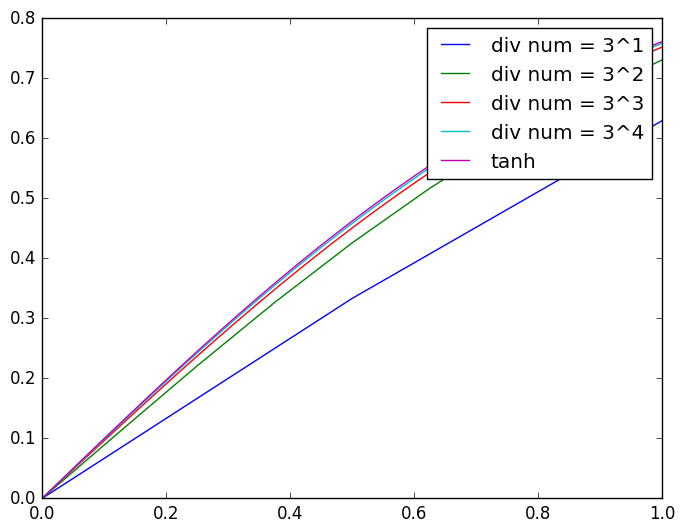

PyObject <matplotlib.legend.Legend object at 0x315ec99e8>

In [2]:
f = (x, t) -> 1 - x^2
euler_method(0, 1, 10, f, 0.0)
for i in 1:4
    xs = euler_method(0, 1, 3^i, f, 0.0)
    plot(collect(linspace(0, 1, 3^i)), xs, label="div num = 3^$i")
end
plot(collect(linspace(0, 1, 3^4)), tanh(collect(linspace(0, 1, 3^4))), label="tanh")
legend()

In [3]:
function euler_method(a, b, n, fs, x_1s)
    xss = Array(Float64, (n+1, length(x_1s)))
    for t in 1:length(x_1s)
        xss[1, t] = x_1s[t]
    end
    h = (b-a)/n
    for i in 2:n+1
        for (j, f) in enumerate(fs)
            xss[i, j] = xss[i-1, j] + h * f(xss[i-1, :]..., a + (i-1)*h)
        end
    end
    return xss
end

euler_method (generic function with 1 method)

### 例2
$\ddot x = -bx, \ x(0) = 0, \ \dot x(0) = 2, \ b = 1$ のとき, 解析解は
$$x = - i (e^{i\sqrt{b}t} - e^{-i\sqrt{b}t}) = 2\sin t\\$$

In [4]:
b = 1
g_1 = (x_1, x_2, t) -> x_2
g_2 = (x_1, x_2, t) -> -b*x_1
xys = euler_method(0, 10, 100, (g_1, g_2), (0, 2.0))
print()

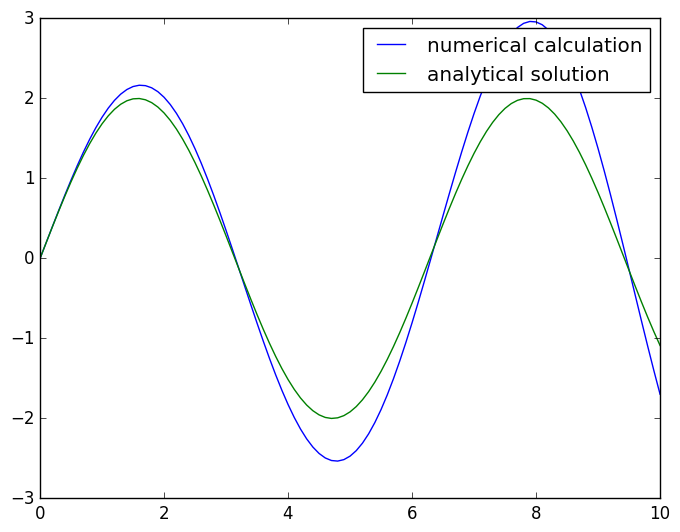

PyObject <matplotlib.legend.Legend object at 0x318a41588>

In [5]:
plot(collect(linspace(0, 10, 101)), xys[:, 1], label="numerical calculation")
plot(collect(linspace(0, 10, 101)), map(t -> 2*sin(t), collect(linspace(0, 10, 101))), label="analytical solution")
legend()

Euler法がきちんと働いていることを示すのは, 「h = 0.1の解とh= 0.05との解の差が, h = 0.2の解とh=0.1の解との差の約半分になっていること」

刻み幅hをどんどんと半分にしていき誤差を観察するとき, 最後の刻み幅での数値解を使用するとする.
hを最終的な刻み幅ととする.
このとき, 一回の数値計算での計算数は区間の幅/刻み幅であるから, それらの合計は
$$
区間の幅/h + 区間の幅/(2h)  +区間の幅/(4h) + \cdots + 区間の幅/(2^{k-1} h) + 区間の幅/(2^k h)
$$
$$
\leq 区間の幅/h (1 + 1/2 + 1/4 + \cdots) = 2区間の幅/h
$$

Euler法は理解が簡単だが, 実用的とはいえない.

誤差がhに比例するため, 誤差を半分にするためには二倍の計算が必要になる.

ここで, "精度"を「刻み幅hを十分小さくした時, 数値解と真の解との差が$O(h^p)$に比例して小さくなる」という形で定義する.

Euler法は誤差がO(h)の解法である. [](証明→[オイラー法による微分方程式の近似解の誤差評価について](http://aitech.ac.jp/lib/kiyou/38A/38A-13.pdf)

### 修正オイラー法

$$
\tilde x_{n+1} = x_n + h f_n,\ f_n = f(x_n, t_n)\\
$$
$$
x_{n+1} = x_n + h\frac{f_n + \tilde f_{n +1}}{2}\\
$$
ただし$\tilde f_{n+1} = f(\tilde x_{n+1}, t_{n+1})$

オイラー法で仮に$\tilde x_{n+1}$を出し,次に$(t_{n+1}, \tilde x_{n+1})$での$dx/dt$の値$\tilde f_{n+1}$を計算して$f_n$と$\tilde f_{n+1}$の平均を$t_n$から$t_{n+1}$の間のxの平均増加率として用いるという方法.

オイラー法は関数fの高階の微係数が必要になるので必ずしも適当ではない.

### 例3
$\ddot x = -bx, \ x(0) = 0, \ \dot x(0) = 2, \ b = 1$ のとき, 解析解は$2\sin t$である. 修正オイラー法を用いてみる.

In [26]:
function better_euler_method(a, b, n, fs, x_1s)
    xss = Array(Float64, (n+1, length(x_1s)))
    for t in 1:length(x_1s)
        xss[1, t] = x_1s[t]
    end
    h = (b-a)/n
    for i in 2:n+1
        for (j, f) in enumerate(fs)
            bar_f = f(xss[i-1, :]..., a + (i-1)*h)
            tilde_x =  xss[i-1, j] + h * bar_f
            tilde_f = f(xss[i-1, 1:(j-1)]..., tilde_x, xss[i-1, (j+1):end]..., a + i*h)
            xss[i, j] = xss[i-1, j] + h * (bar_f + tilde_f)/2
        end
    end
    return xss
end

better_euler_method (generic function with 1 method)

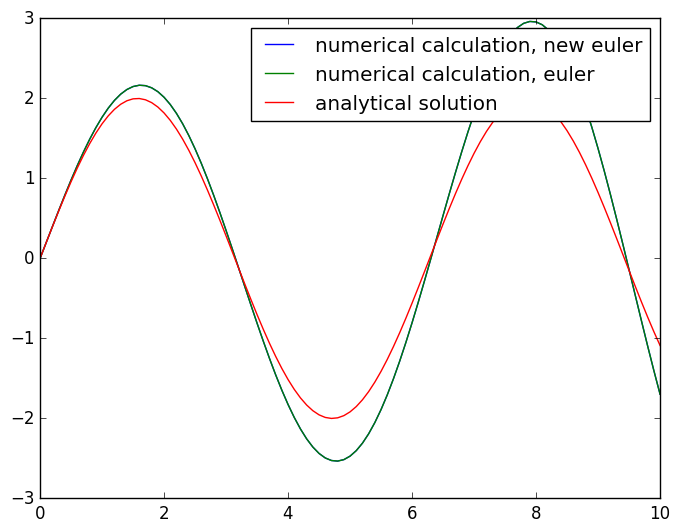

PyObject <matplotlib.legend.Legend object at 0x31a810588>

In [20]:
b = 1
g_1 = (x_1, x_2, t) -> x_2
g_2 = (x_1, x_2, t) -> -b*x_1
xys = better_euler_method(0, 10, 100, (g_1, g_2), (0.0, 2.0))
xys_bad = euler_method(0, 10, 100, (g_1, g_2), (0.0, 2.0))
print()

plot(collect(linspace(0, 10, 101)), xys[:, 1], label="numerical calculation, new euler")
plot(collect(linspace(0, 10, 101)), xys_bad[:, 1], label="numerical calculation, euler")
plot(collect(linspace(0, 10, 101)), map(t -> 2*sin(t), collect(linspace(0, 10, 101))), label="analytical solution")
legend()

In [21]:
function better_euler_method(a, b, n, f, x_1)
    h = (b-a)/n
    xs = Array(Float64, n)
    xs[1] = x_1
    for i in 2:n
        tilde_x = xs[i-1] + h * f(xs[i-1], a + i*h)
        bar_f = f(xs[i-1], a + (i-1)*h)
        tilde_f = f(tilde_x, a + i*h)
        xs[i] = xs[i-1] + h * (bar_f + tilde_f)/2
    end
    return xs
end

better_euler_method (generic function with 1 method)

### 例4
$\dot x = 1 - x^2, \ x(0) = 0$のとき(解析解はtanh(x))

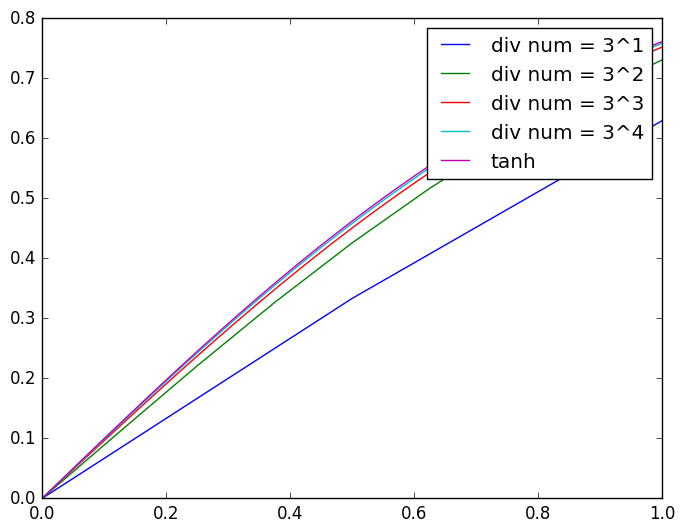

PyObject <matplotlib.legend.Legend object at 0x31aa2be80>

In [24]:
f = (x, t) -> 1 - x^2
better_euler_method(0, 1, 10, f, 0.0)
for i in 1:4
    xs = euler_method(0, 1, 3^i, f, 0.0)
    plot(collect(linspace(0, 1, 3^i)), xs, label="div num = 3^$i")
end
plot(collect(linspace(0, 1, 3^4)), tanh(collect(linspace(0, 1, 3^4))), label="tanh")
legend()

### Runge-Kuuta法
関数$f(x, t)$の微係数の値を使用せずに, 区間$t_n \leq t \leq t_{n+1}$の中に入る適当な点$t = t_n + \theta_i h, \ (0\leq \theta_i \leq 1),\ i = 1, 2, \ldots, k$での$f(x, t)$の関数値だけを使用する公式を導ける.

 次数p = 2の場合
 
 $$
 k_1 = hf(x_n, t_n)\\
 k_2 = hf(x_n + k_1, t_{n+1})\\
 x_{n+1} = x_n + 1/2 (k_1 + k_2)
 $$
 
 （詳細は黒板で)

次数p = 4の場合
$$
x^{(1)}_n = x_n + (h/2) f^{(1)}_n,\ f_n^{(1)} = f(x_n, t_n)\\
$$
$$
x^{(2)}_n = x_n + (h/2) f^{(2)}_n,\ f_n^{(2)} = f(x^{1}_n, t_n+(h/2))\\
$$
$$
x^{(3)}_n = x_n + h f^{(3)}_n,\ f_n^{(3)} = f(x^{(2)}_n, t_n+(h/2))\\
$$
$$
x_{n+1} = x_n + (h/6) (f^{(1)}_n+ 2f^{21)}_n+2f^{(3)}_n+f^{(4)}_n),\ f_n^{(4)} = f(x^{3}_n, t_{n+1})\\
$$

### 多段階法
$x_{n+1}$を求めるのに$x_{n}$だけでなく$x_{n-1}$なども使う
$$
\alpha_k v_{n+k} + \alpha_{k-1} v_{n+k-1}  + \cdots + \alpha_0 v_0\\
$$
$$
= h{\beta_k f_{n+k} + \beta_{k-1} f_{n+k-1} + \cdots + \beta_0 f_{0}}\\
$$
ただし$f_j = f(x_j, t_j)$

### 予測子・修正子法
### 多段階法(次数p = 4の場合)
$$
x_{n+1} = x_n + (h/24) (55f_n - 59 f_{n-1} + 37 f_{n-2} - 9f_{n-3})\\
$$
によって予測値を出し, 
$$
x_{n+1} = x_n + (h/24) (9f(\tilde x_{n+1}, t_{n+1}) + 19f_n -5 f_{n-1} + f_{n-2})\\
$$
によって修正値をだす.

多段階法は, 事前準備さえしていればfの計算回数が少なくても精度があげられる.　しかし刻み幅hを途中で変えようとすると厄介.

## 刻み幅と次数の適応制御

xやtが変わるときに微分方程式の性質がそれほど激しく変わらなければ, 次数や刻み幅を変えなくても良い.
方程式をより解きやすく変形する.

$$
\frac{dx^i}{dt} = f^i(x^1, x^2, \ldots, x^m, t),\ \ x^i(a) = x^i_0\\
$$
に対して新しい変数$s (\geq 0)$を導入してtをsの関数とみなし,
$$
\frac{dx^i}{ds} = g^i(x^1, x^2, \ldots, x^m, t)\\
\frac{dt}{ds} = g^0(x^1, x^2, \ldots, x^m, t),\ \ x^i(a) = x^i_0, t(0) = a\\
$$
と書き換える.

ただし, 
$$
g^0(x^1, x^2, \ldots, x^m, t) = \frac{1}{\sqrt{1 + \sum^m_{i = 1} (f^i(x_1, \ldots, x_m, t))^2}}\\
$$
$$
g^i(x^1, x^2, \ldots, x^m, t) = f^i(x^1, \ldots, x^m, t)g^0(x^1,\ldots, x^m, t)\\
$$

In [10]:
g_1 = (x_1, x_2, x_3, x_4, t) -> x_3
g_2 = (x_1, x_2, x_3, x_4, t) -> x_4
g_3 = (x_1, x_2, x_3, x_4, t) -> -x_1/(x_1^2 + x_2^2)^(3/2)
g_4 = (x_1, x_2, x_3, x_4, t) -> -x_2/(x_1^2 + x_2^2)^(3/2)

(anonymous function)

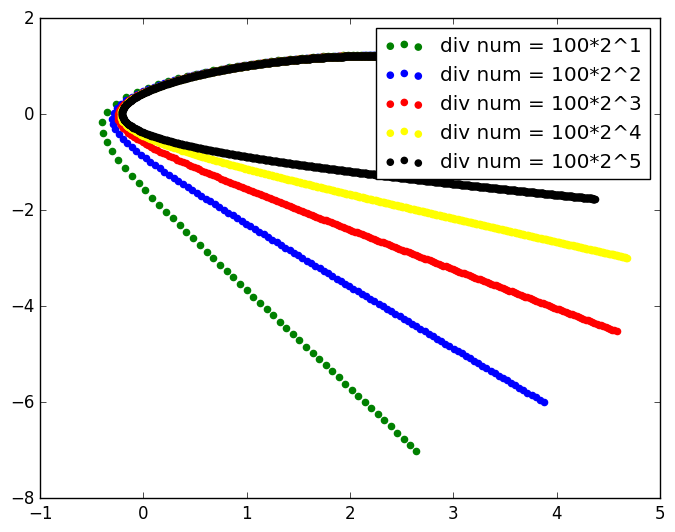

PyObject <matplotlib.legend.Legend object at 0x318cae898>

In [11]:
colors=["green", "blue", "red", "yellow", "black"]
for i in 1:5
    xyuvs = euler_method(0, 16, 100*2^i, (g_1, g_2, g_3, g_4), (3, 0, 0.3, 0.2))
    scatter(xyuvs[:, 1], xyuvs[:, 2], color=colors[i], label="div num = 100*2^$i")
end
legend()

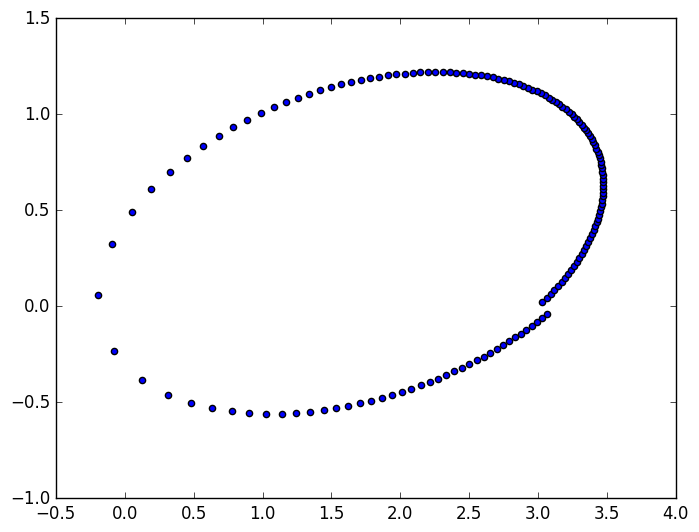

PyObject <matplotlib.collections.PathCollection object at 0x31a633ac8>

In [15]:
xyuvs = euler_method(0, 16, 150000, (g_1, g_2, g_3, g_4), (3, 0, 0.3, 0.2))
retrieve(as) = [as[i*1000] for i in 1:div(length(as), 1000)]
scatter(retrieve(xyuvs[:, 1]), retrieve(xyuvs[:, 2]))